한글 깨짐 방지

In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


지역명을 입력받아서 연령별 인구수 데이터 시각화하기

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 중구 명동


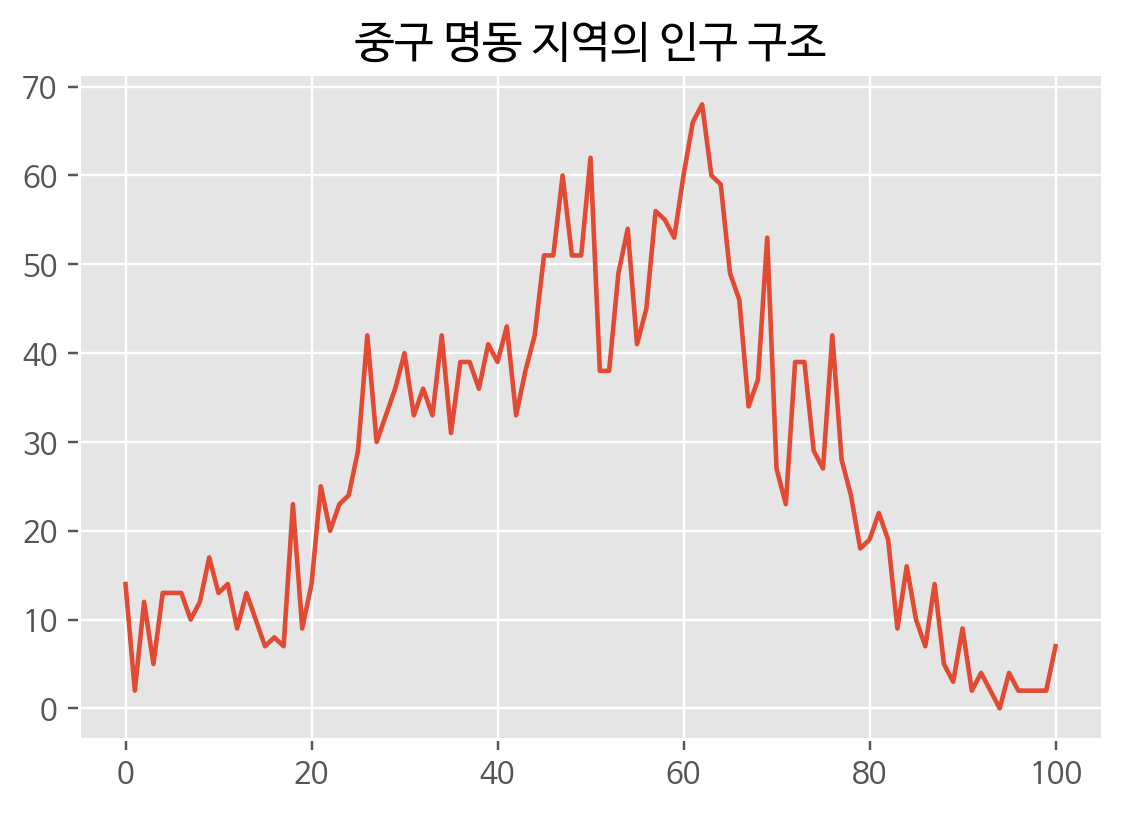

In [7]:
f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

result = []   # 순서를 위해 인덱스가 있는 리스트로 담는다.

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

for row in data:
  if name in row[0]:
    for i in row[3:]:
      result.append(int(i.replace(',', '')))   # 인구수 데이터 정수로 변환 후 result 변수에 저장

# 인구구조 시각화
plt.figure(dpi = 110)
plt.title(name+' 지역의 인구 구조')
plt.style.use('ggplot')
plt.plot(result)
plt.show()

막대그래프 그리기 -> 비교 (지역별, 성별 기준 등)

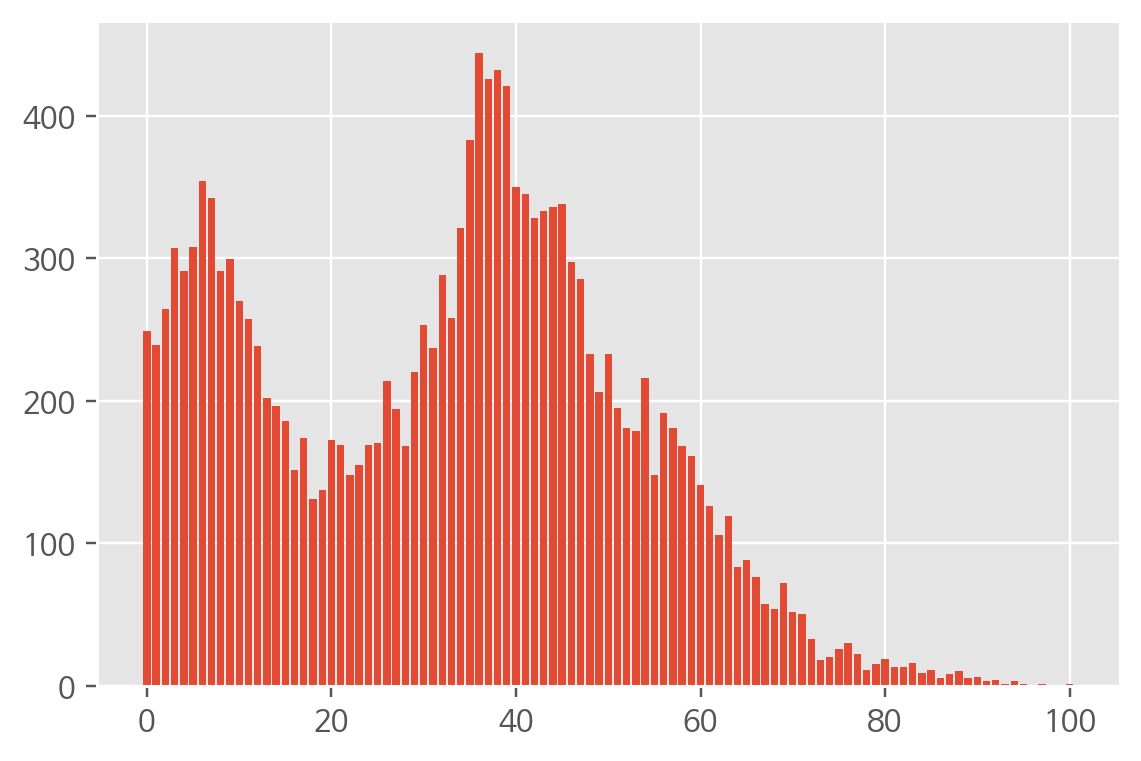

In [13]:
f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

result = []   # 순서를 위해 인덱스가 있는 리스트로 담는다.


for row in data:
  if '보람동' in row[0]:
    for i in row[3:]:
      result.append(int(i.replace(',', '')))   # 인구수 데이터 정수로 변환 후 result 변수에 저장


plt.figure(dpi = 110)
plt.bar(range(101),result)
plt.show()

수평 막대그래프(barh() 함수)를 활용해 우리 동네 인구 구조 시각화하기

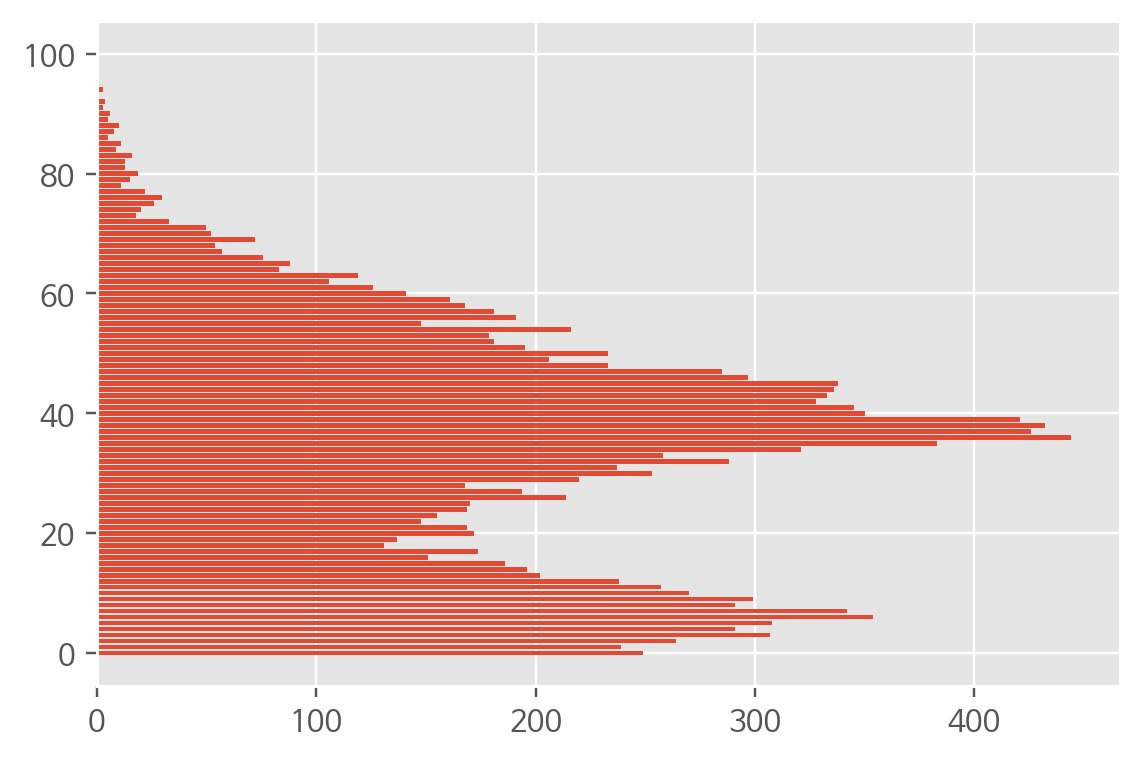

In [14]:
f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

result = []   # 순서를 위해 인덱스가 있는 리스트로 담는다.


for row in data:
  if '보람동' in row[0]:
    for i in row[3:]:
      result.append(int(i.replace(',', '')))   # 인구수 데이터 정수로 변환 후 result 변수에 저장


plt.figure(dpi = 110)
plt.barh(range(101),result)
plt.show()

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 보람동


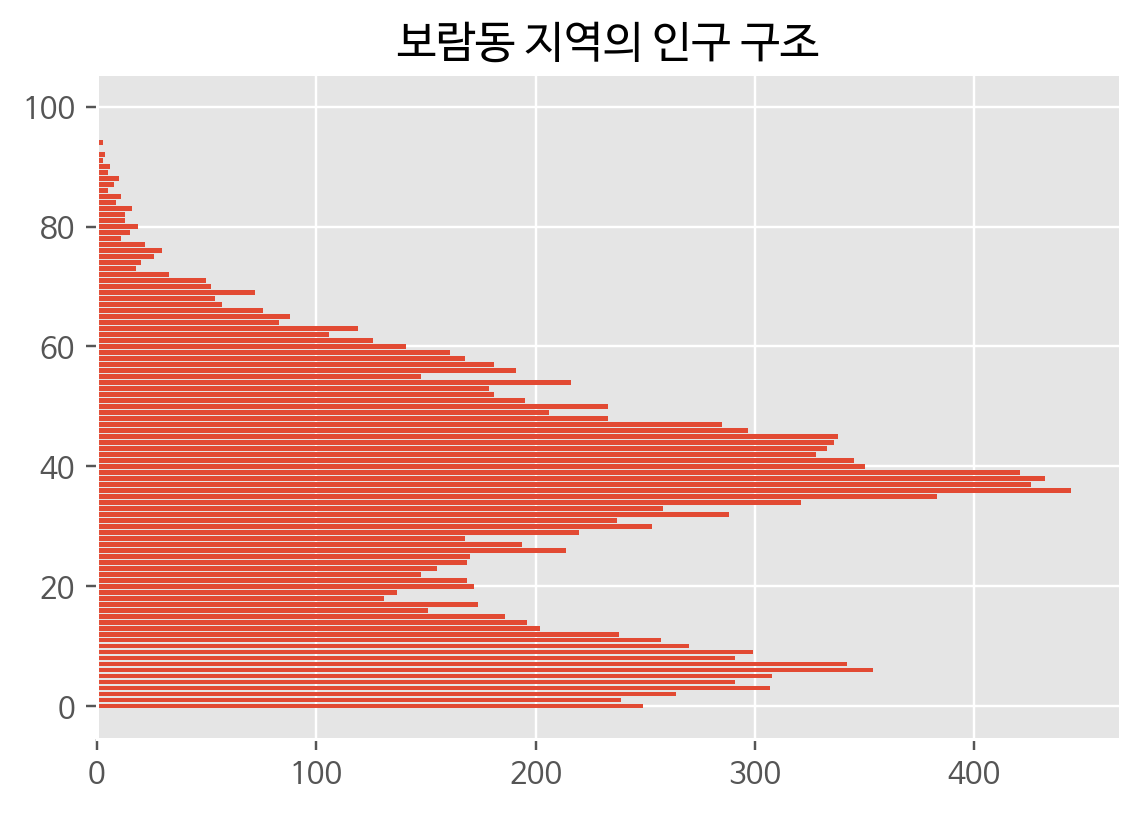

In [16]:
f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

result = []   # 순서를 위해 인덱스가 있는 리스트로 담는다.

name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

for row in data:
  if name in row[0]:
    for i in row[3:]:
      result.append(int(i.replace(',', '')))   # 인구수 데이터 정수로 변환 후 result 변수에 저장

# 인구구조 시각화
plt.figure(dpi = 110)
plt.title(name+' 지역의 인구 구조')
plt.style.use('ggplot')
plt.barh(range(101), result)
plt.show()

항아리 모양 그래프 그리기

성별 데이터 저장하기(Type1)

In [23]:
f = open('/content/gender.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

m = []
f = []

for row in data:
  if '신도림' in row[0]:
    for i in range(101):   # 컬럼을 알고있을 때
      m.append(int(row[i+3]))
      f.append(int(row[-(i+1)])) # -1 값부터 담음 -> 100세 이상 부터 값이 담김
f.reverse()  # 100세 부터 담긴 값을 0세 부터 담기도록 바꿔준다

In [25]:
print(m)
print(f)

[165, 185, 221, 209, 192, 209, 189, 210, 217, 197, 210, 198, 198, 189, 171, 156, 183, 178, 205, 175, 203, 218, 210, 257, 222, 249, 203, 239, 227, 212, 250, 237, 270, 309, 308, 387, 366, 367, 349, 390, 324, 330, 342, 306, 363, 348, 331, 321, 302, 275, 264, 253, 258, 266, 280, 224, 280, 257, 277, 246, 270, 217, 194, 248, 180, 193, 177, 130, 148, 159, 154, 141, 112, 77, 86, 70, 86, 69, 57, 47, 51, 44, 26, 32, 20, 9, 19, 13, 5, 6, 3, 3, 3, 2, 1, 3, 1, 1, 1, 0, 1]
[152, 164, 195, 195, 200, 206, 227, 222, 195, 198, 201, 190, 161, 174, 161, 178, 166, 163, 203, 193, 192, 220, 218, 256, 235, 216, 239, 255, 229, 268, 305, 296, 306, 318, 336, 369, 393, 441, 382, 396, 355, 357, 355, 321, 366, 351, 303, 327, 329, 299, 299, 246, 247, 294, 240, 222, 258, 307, 280, 268, 263, 238, 224, 269, 201, 185, 225, 140, 143, 120, 118, 143, 86, 85, 74, 84, 87, 69, 73, 67, 63, 53, 60, 46, 44, 31, 29, 29, 21, 25, 18, 12, 11, 10, 3, 7, 3, 2, 1, 3, 6]


성별 데이터 저장하기(Type2)

In [27]:
f = open('/content/gender.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

m = []
f = []

for row in data:
  if '신도림' in row[0]:
    for i in row[3:104]:    # 남성 : 3 ~ 103번 데이터 슬라이싱 - 정수 데이터로 변환 - 리스트에 저장
      m.append(int(i))
    for b in row[106:]:
      f.append(int(b))      # 여성 : 106 ~ 끝까지 데이터 슬라이싱 ''

In [28]:
print(m)
print(f)

[165, 185, 221, 209, 192, 209, 189, 210, 217, 197, 210, 198, 198, 189, 171, 156, 183, 178, 205, 175, 203, 218, 210, 257, 222, 249, 203, 239, 227, 212, 250, 237, 270, 309, 308, 387, 366, 367, 349, 390, 324, 330, 342, 306, 363, 348, 331, 321, 302, 275, 264, 253, 258, 266, 280, 224, 280, 257, 277, 246, 270, 217, 194, 248, 180, 193, 177, 130, 148, 159, 154, 141, 112, 77, 86, 70, 86, 69, 57, 47, 51, 44, 26, 32, 20, 9, 19, 13, 5, 6, 3, 3, 3, 2, 1, 3, 1, 1, 1, 0, 1]
[152, 164, 195, 195, 200, 206, 227, 222, 195, 198, 201, 190, 161, 174, 161, 178, 166, 163, 203, 193, 192, 220, 218, 256, 235, 216, 239, 255, 229, 268, 305, 296, 306, 318, 336, 369, 393, 441, 382, 396, 355, 357, 355, 321, 366, 351, 303, 327, 329, 299, 299, 246, 247, 294, 240, 222, 258, 307, 280, 268, 263, 238, 224, 269, 201, 185, 225, 140, 143, 120, 118, 143, 86, 85, 74, 84, 87, 69, 73, 67, 63, 53, 60, 46, 44, 31, 29, 29, 21, 25, 18, 12, 11, 10, 3, 7, 3, 2, 1, 3, 6]


<function matplotlib.pyplot.show>

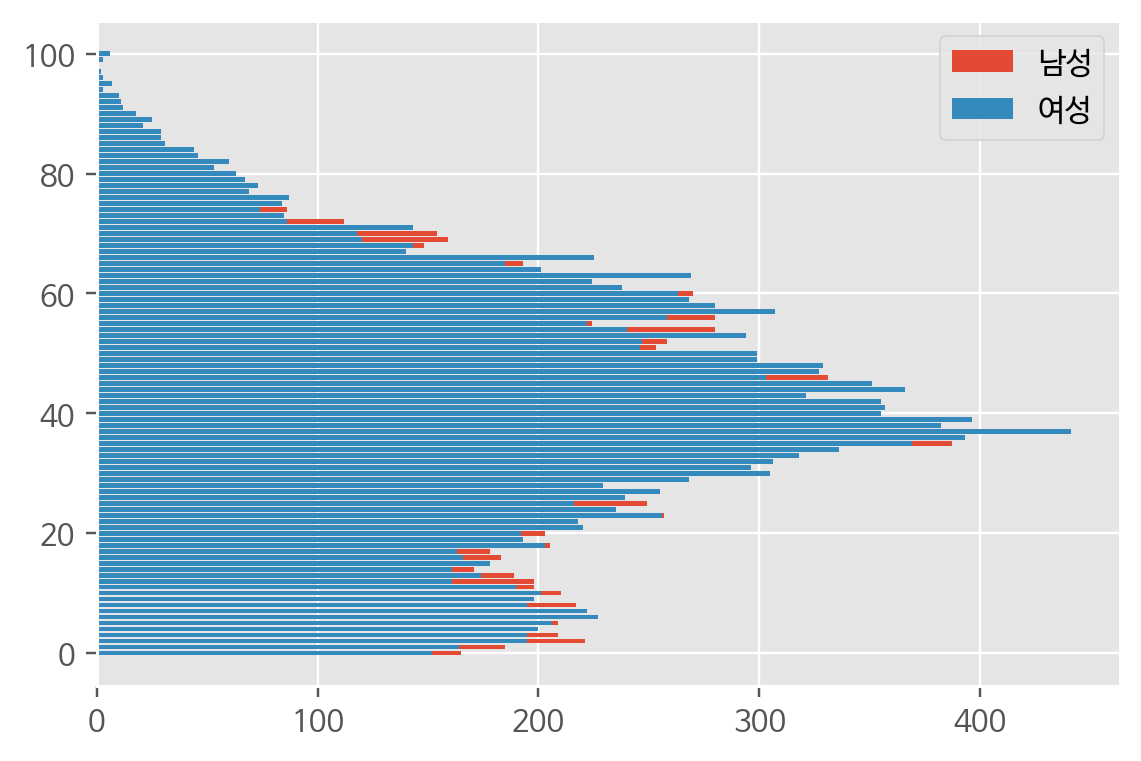

In [30]:
plt.figure(dpi = 110)
plt.barh(range(101), m, label = '남성')
plt.barh(range(101), f, label = '여성')
plt.legend()
plt.show

항아리 

<function matplotlib.pyplot.show>

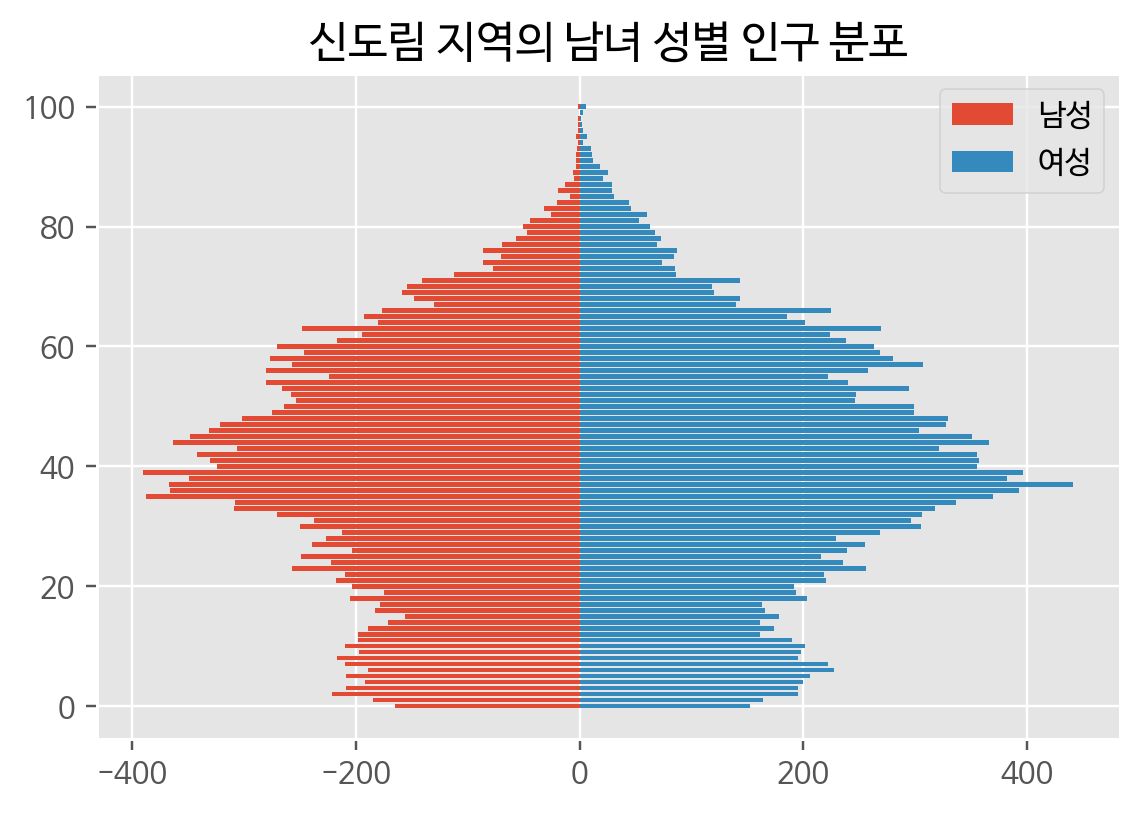

In [32]:
f = open('/content/gender.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

m = []
f = []

for row in data:
  if '신도림' in row[0]:
    for i in row[3:104]:    # 남성 : 3 ~ 103번 데이터 슬라이싱 - 정수 데이터로 변환 - 리스트에 저장
      m.append(-int(i))
    for b in row[106:]:
      f.append(int(b))      # 여성 : 106 ~ 끝까지 데이터 슬라이싱 ''

plt.figure(dpi = 110)
plt.title('신도림 지역의 남녀 성별 인구 분포')
plt.barh(range(101), m, label = '남성')
plt.barh(range(101), f, label = '여성')
plt.legend()
plt.show